# Octave examples

## Simple plots

Let us see some simple plots using the function $\sin(t)$ and its FFT. The plots are grouped in subplots of a figure.

In [1]:
n = 200;
tmax= 20;
t = linspace(0,tmax,201)';
fmax= 1/t(2)/2

fmax =  5


In [2]:
y = sin(t);
Y = abs(fft(y))*2/n;
f = linspace(0,fmax,n/2+1)';
whos t y Y f

Variables in the current scope:

   Attr Name        Size                     Bytes  Class
   ==== ====        ====                     =====  ===== 
        t         201x1                       1608  double
        y         201x1                       1608  double
        Y         201x1                       1608  double
        f         101x1                        808  double

Total is 704 elements using 5632 bytes



In [3]:
available_graphics_toolkits

ans = 
{
  [1,1] = gnuplot
}


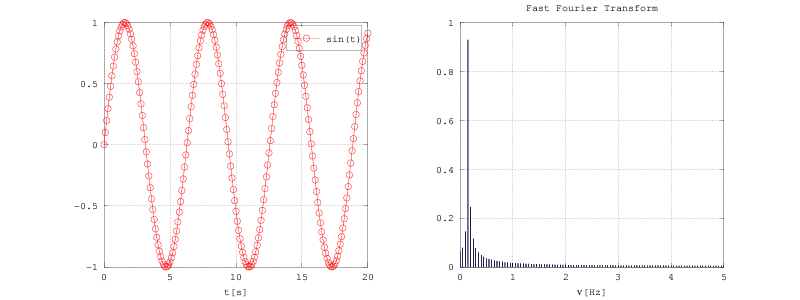

In [4]:
figure(1,"position",[0 0 800 300])
subplot(121)
plot(t,y,'r-o;sin(t);',"linewidth",1)
axis([0 tmax -1 1])
xlabel("t[s]")
grid()

subplot(122)
bar(f,Y(1:101),.1)
axis([0 fmax 0 1])
title("Fast Fourier Transform")
xlabel('\nu[Hz]',"interpreter","tex")
grid()

In [5]:
help plot

'plot' is a function from the file /usr/share/octave/4.0.3/m/plot/draw/plot.m

 -- Function File: plot (Y)
 -- Function File: plot (X, Y)
 -- Function File: plot (X, Y, FMT)
 -- Function File: plot (..., PROPERTY, VALUE, ...)
 -- Function File: plot (X1, Y1, ..., XN, YN)
 -- Function File: plot (HAX, ...)
 -- Function File: H = plot (...)
     Produce 2-D plots.

     Many different combinations of arguments are possible.  The
     simplest form is

          plot (Y)

     where the argument is taken as the set of Y coordinates and the X
     coordinates are taken to be the range '1:numel (Y)'.

     If more than one argument is given, they are interpreted as

          plot (Y, PROPERTY, VALUE, ...)

     or

          plot (X, Y, PROPERTY, VALUE, ...)

     or

          plot (X, Y, FMT, ...)

     and so on.  Any number of argument sets may appear.  The X and Y
     values are interpreted as follows:

        * If a single data argument is supplied, it is taken as the set
         

## Benchmark

Calculating benchmark and GFlops from matrix multiplication (see https://devblogs.nvidia.com/drop-in-acceleration-gnu-octave/)

In [17]:
n = 8192;
aa = single(rand(n,n));
bb = single(rand(n,n));
start = clock();
tic
cc = aa*bb;
toc
elapsedTime = etime(clock(),start);
gFlops = 2*n*n*n/(elapsedTime * 1e+9);
%disp(gFlops);
printf("Elapsed time: %.2f sec (%.2f GFlops)\n",elapsedTime,gFlops);

Elapsed time is 6.81828 seconds.
Elapsed time: 6.83 sec (160.93 GFlops)


In [18]:
whos aa bb cc

Variables in the current scope:

   Attr Name        Size                     Bytes  Class
   ==== ====        ====                     =====  ===== 
        aa       8192x8192               268435456  single
        bb       8192x8192               268435456  single
        cc       8192x8192               268435456  single

Total is 201326592 elements using 805306368 bytes

